## import required libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## load the dataset

In [25]:
file_path = "iris.data"

columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "species"
]

df = pd.read_csv(file_path, header=None, names=columns)


## view the data

In [26]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## dataset shape 

In [27]:
df.shape


(150, 5)

## check datatypes

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# dataset exploration

## check class distribution

In [29]:
df['species'].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## statistical summary

In [30]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# data visualization

## scatter plot

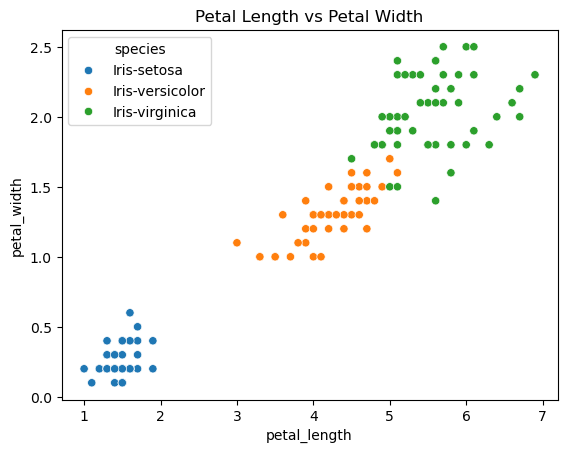

In [31]:
sns.scatterplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    data=df
)
plt.title("Petal Length vs Petal Width")
plt.show()


## pair plot

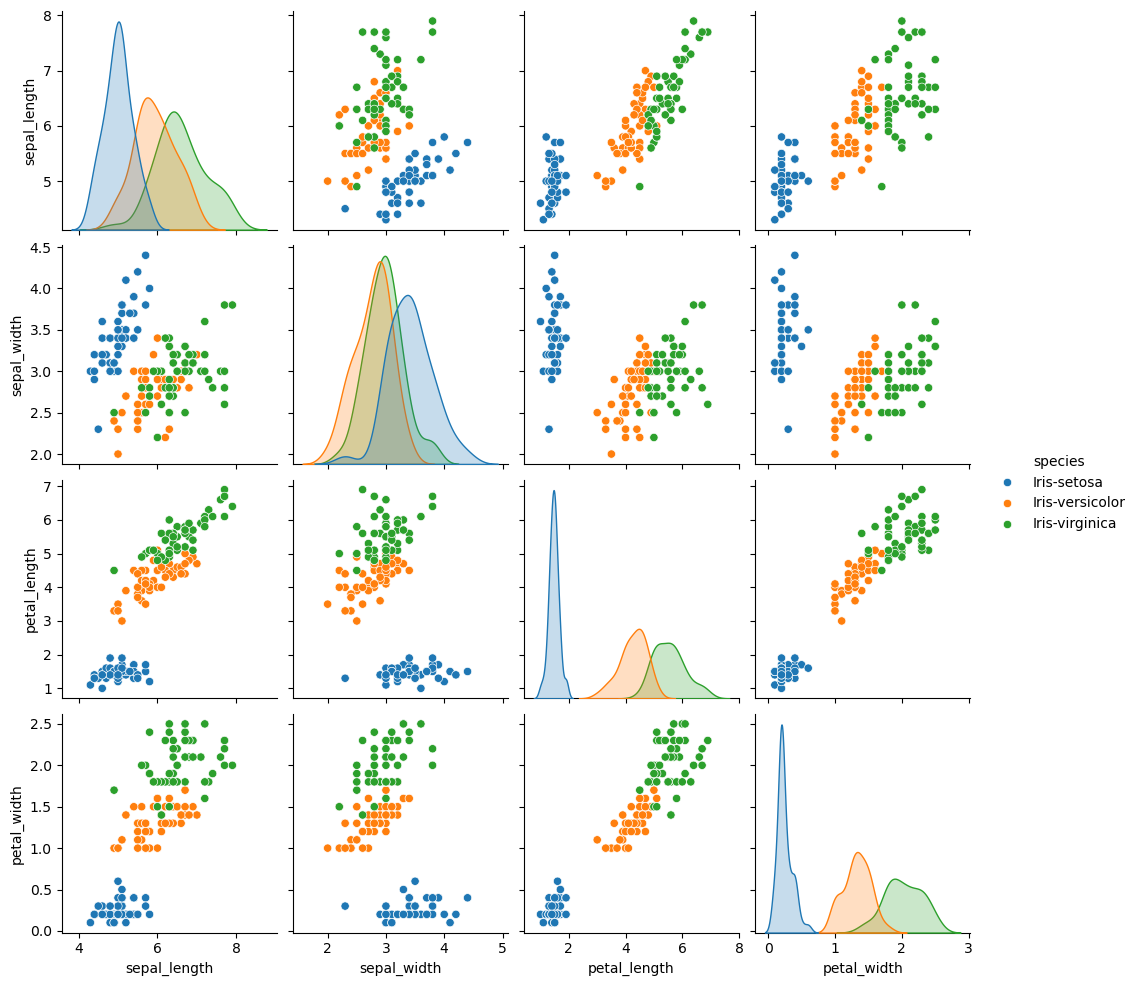

In [32]:
sns.pairplot(df, hue="species")
plt.show()


# data visualalization

## check missing values

In [33]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## encore target lables 

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['species_encoded'] = encoder.fit_transform(df['species'])


## separate features and target

In [35]:
X = df.iloc[:, 0:4]
y = df['species_encoded']
  


## feature scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## train_test_split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)


## train the model

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# model evaluation

### predictions

In [39]:
y_pred = model.predict(X_test)


### accuracy

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


1.0

### classification report

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### confusion matrix

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

### visualize confusion matrix

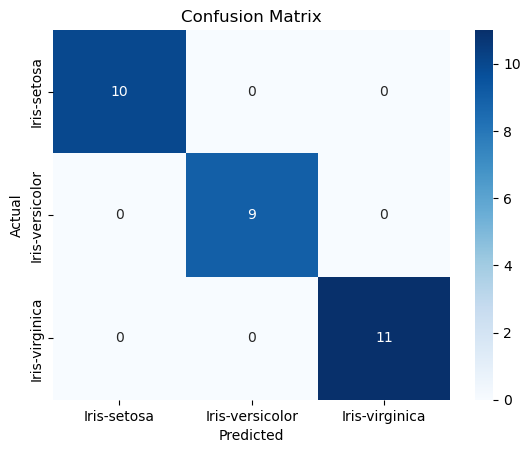

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
